In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
V = 39
N = 7

In [20]:
X = np.array([V + 13, V + 16, V + 19, V + 23, V + 26, V + 30, V + 42])
Y = np.array([V + 3, V + 5, V + 4, V + 6, V + 6, V + 9, V + 8])
X

array([52, 55, 58, 62, 65, 69, 81])

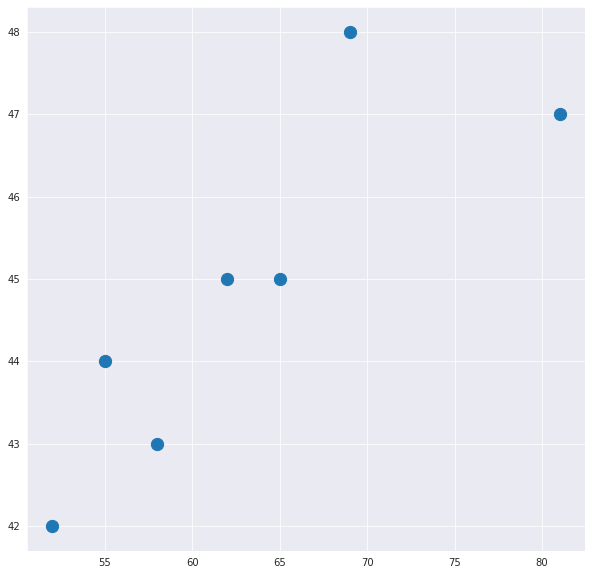

In [21]:
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, s=150)

# Linear regression dependence
---
$$Y = X\cdot B$$

$$X =

\begin{pmatrix}
1 & 52\\
1 & 55\\
1 & 58\\
1 & 62\\
1 & 65\\
1 & 69\\
1 & 81\\
\end{pmatrix}$$
$$B = \begin{pmatrix}
\beta_0 \\
\beta_1
\end{pmatrix}$$
$$B = \left(X^T X\right)^{-1} X^T \cdot Y$$

In [22]:
X_ = np.stack((np.ones_like(X), X), axis=1)
X_

array([[ 1, 52],
       [ 1, 55],
       [ 1, 58],
       [ 1, 62],
       [ 1, 65],
       [ 1, 69],
       [ 1, 81]])

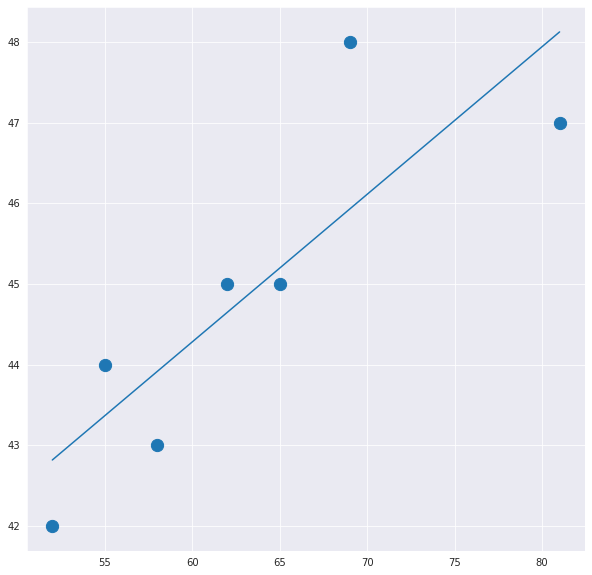

In [23]:
[b_0, b_1] = (np.linalg.inv(X_.T @ X_) @ X_.T) @ Y
plt.figure(figsize=(10, 10))
plt.scatter(X, Y, s=150)
xrange = np.linspace(min(X), max(X), 10)
plt.plot(xrange, xrange * b_1 + b_0)

# Pearson Correlation
$$
r_{xy} = \frac{n\sum x_i y_i - \sum x_i \sum y_i}{\sqrt{n\sum x_i^2 -\left(\sum x_i\right)^2}\sqrt{n\sum y_i^2 -\left(\sum y_i\right)^2}}
$$

In [24]:
nominator = (N * np.dot(X, Y) - np.sum(X) * np.sum(Y))
denominator = np.sqrt((N * np.sum(X ** 2) - (np.sum(X) ** 2))) * np.sqrt((N * np.sum(Y ** 2) - np.sum(Y) ** 2))
cor = nominator / denominator
print(f"The Pearson correlation coefficient is {cor}")

The Pearson correlation coefficient is 0.8461939260999832


---

## Determination coef
$$R^2 = \frac{RSS}{TSS}$$
$$RSS = \sum (y_i - \hat y_i)^2$$
$$TSS = \frac{1}{n}\sum (y_i - \bar y)^2$$
$$\hat y = \frac{1}{n}\sum y_i$$

In [25]:
RSS = np.sum((Y - b_0 - b_1 * X) ** 2)
TSS = np.sum((Y - Y.mean()) ** 2)
s = np.sqrt(RSS / (N - 1 - 1))
R2 = 1 - RSS / TSS
R2

0.716044160568504

$R^2$  is not low, so The model reveals a correlation, but does not correspond to the data

In [26]:
X_test = 10
y_preds = b_0 + b_1 * X_test
print(f"The predicted value for X = 10 is {y_preds}")

The predicted value for X = 10 is 35.13717693836953


---
## Проверьте гипотезу о значимости параметра по критерию Стьдента

In [27]:
t_cr = 2.571
Q = np.array([np.linalg.inv((X_.T @ X_))[i][i] for i in range(2)])
S = s * Q

In [28]:
Q = np.sqrt(Q)

In [29]:
np.array((Q, S))

array([[2.66055047e+00, 4.17080643e-02],
       [8.74205047e+00, 2.14837640e-03]])

In [30]:
np.abs([b_0,b_1] / S) > t_cr

array([ True,  True])

**Вывод:**

По критерию Стьюдента оба параметра значимы

---
## Проверьте гипотезу о значимости модели по критерию Фишера

In [31]:
F = R2 / (1 - R2) * (N - 1 - 1)
F_cr = 6.6079

In [32]:
F > F_cr

True

**Вывод:**

По критерию Фишера модель значима